# Investigating mass estimation with dust extinction 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from XRBID.Sources import LoadSources, GetDaoPhots
from XRBID.DataFrameMod import Find, BuildFrame
from XRBID.CMDs import FitSED, PlotSED, PlotHR

import os

cd = os.chdir
hstdir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/"
chandra_hst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-HST/"
chandra_jwst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/"
jwstdir = "/Users/undergradstudent/Research/XRB-xAnalysis/Galaxies/M66/JWST/"
M66_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/"

# jwst directories
f200w = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f200w_v1p1_img.fits"
f300m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f300m_v1p1_img.fits"
f335m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f335m_v1p1_img.fits"
f360m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f360m_v1p1_img.fits"

# hst directories
f275w = hstdir+"M66_mosaic_uvis_f275w_drc_sci.fits"
f336w = hstdir+"M66_mosaic_uvis_f336w_drc_sci.fits"
f438w = hstdir+"M66_mosaic_uvis_f438w_drc_sci.fits"
f555w = hstdir+"M66_mosaic_uvis_f555w_drc_sci.fits"
f814w = hstdir+"M66_mosaic_uvis_f814w_drc_sci.fits"

## HST

In [5]:
M66_notes = pd.read_csv(chandra_hst_dir+"M66_XRB_notes.txt")
M66_notes = M66_notes.loc[:, ~M66_notes.columns.str.contains('^Unnamed')]

DaoCleanMatch = pd.read_csv(chandra_hst_dir+"M66_daoclean_matches.frame")
DaoCleanMatch = DaoCleanMatch.loc[:, ~DaoCleanMatch.columns.str.contains('^Unnamed')]

In [6]:
hmxbs = Find(M66_notes, 'Class == HMXB')

# Create dataframe with only the columns of DaoCleanMatch.
# Then out of DaoCleanMatch, only add the best-star matches from 
# the hmxb dataframe to this new dataframe 
hmxb_df = BuildFrame(headers=DaoCleanMatch.columns.tolist())
for index1, row1 in DaoCleanMatch.iterrows():
    for index2, row2 in hmxbs.iterrows():
        if DaoCleanMatch['CSC ID'][index1] == hmxbs['CSC ID'][index2]:
            if DaoCleanMatch['StarID'][index1] == hmxbs['Best Star'][index2]:
                hmxb_df = hmxb_df._append(DaoCleanMatch.iloc[index1], ignore_index=True)

dist = 11.32e6 # units pc from https://archive.stsci.edu/hlsp/phangs.html#hst_image_products_table
dmod = 5 * np.log10(dist) - 5
cd(hstdir)
HMXBPhots = GetDaoPhots(hmxb_df, 
                        photfiles=['photometry_M66_f555w_wfc3_sources.ecsv',
                                    'photometry_M66_f438w_wfc3_sources.ecsv',
                                    'photometry_M66_f814w_wfc3_sources.ecsv',
                                    'photometry_M66_f275w_wfc3_sources.ecsv',
                                    'photometry_M66_f336w_wfc3_sources.ecsv'],
                        idheads=['F555W ID', 'F438W ID', 'F814W ID', 'F275W ID', 'F336W ID'],
                        filters=['F555W', 'F438W', 'F814W', 'F275W', 'F336W'],
                        magheader='aperture_mag_corr', dmod=dmod)
HMXBPhots['ID'] = hmxb_df['StarID']
display(HMXBPhots)

Searching photometry_M66_f555w_wfc3_sources.ecsv
Searching photometry_M66_f438w_wfc3_sources.ecsv
Searching photometry_M66_f814w_wfc3_sources.ecsv
Searching photometry_M66_f275w_wfc3_sources.ecsv
Searching photometry_M66_f336w_wfc3_sources.ecsv


X            Y F555W ID  F275W ID  F336W ID  F438W ID  F814W ID  \
0   3743.843919  5833.507868    19247  130956.0       NaN   36055.0       NaN   
1   3700.317585  5908.701948    19792       NaN       NaN   36916.0       NaN   
2   3727.624318  5519.646556    16435       NaN       NaN       NaN       NaN   
3   3652.013236  5540.798551    16667       NaN       NaN   32346.0       NaN   
4   3834.343555  5918.287693    19852       NaN       NaN   37022.0       NaN   
5   3694.780748  5952.563551    20110  134991.0       NaN       NaN       NaN   
6   3595.444164  6102.186159    21187       NaN       NaN   39199.0   20615.0   
7   4265.222965  6110.760032    21250  140213.0  105316.0       NaN   20690.0   
8   4518.077121  6197.146311    21971       NaN       NaN   40508.0   21529.0   
9   3042.724778  6490.637342    24541       NaN  116238.0   44454.0   24097.0   
10  2312.165203  5616.540985    17424       NaN   92649.0   33396.0       NaN   
11  4177.240381  7137.975463    30737  174040.0  133869.0   53074.0   29563.0   
12  3067.397243  4222.603316     5919       NaN   66663.0   16517.0       NaN   
13  2033.527984  6447.470681    24140       NaN  114984.0   43873.0   23724.0   
14  2208.450122  7192.852518    31213       NaN  135197.0   53744.0       NaN   
15  4869.455824  3777.647306     3994       NaN       NaN   12079.0    3930.0   
16  3768.771693  8363.063045    34886  203812.0  157738.0   59483.0       NaN   
17  4463.710840  2888.783967     1804   48203.0       NaN       NaN    1718.0   
18  3375.849092  2661.999469     1476       NaN   25753.0       NaN       NaN   

            RA        Dec                 CSC ID  ... F555W Err     F438W  \
0   170.062292  12.992626  2CXO J112014.9+125933  ... -0.973168 -7.711479   
1   170.062784  12.993454  2CXO J112015.0+125936  ...  1.536468       NaN   
2   170.062475  12.989172  2CXO J112015.0+125921  ... -2.693151       NaN   
3   170.063329  12.989405  2CXO J112015.2+125921  ... -3.374700 -5.046482   
4   170.061270  12.993559  2CXO J112014.7+125937  ... -4.222578 -4.744178   
5   170.062846  12.993936  2CXO J112015.0+125938  ... -6.290347       NaN   
6   170.063968  12.995583  2CXO J112015.3+125944  ...  0.943308       NaN   
7   170.056403  12.995677  2CXO J112013.5+125944  ... -0.364728       NaN   
8   170.053547  12.996628  2CXO J112012.8+125947  ... -0.922180 -4.940801   
9   170.070211  12.999858  2CXO J112016.8+125959  ... -0.157759 -7.299592   
10  170.078462  12.990238  2CXO J112018.8+125924  ... -0.284258 -4.756697   
11  170.057397  13.006982  2CXO J112013.7+130025  ... -0.150042 -7.753705   
12  170.069932  12.974897  2CXO J112016.7+125830  ... -0.412467 -6.160134   
13  170.081610  12.999382  2CXO J112019.5+125958  ... -0.111699 -6.536957   
14  170.079635  13.007586  2CXO J112019.0+130027  ... -0.088761 -5.665787   
15  170.049579  12.970000  2CXO J112011.8+125811  ... -0.285757 -5.435527   
16  170.062011  13.020465  2CXO J112014.9+130113  ... -0.161998 -5.363488   
17  170.054162  12.960218  2CXO J112013.0+125736  ... -0.496001       NaN   
18  170.066447  12.957722  2CXO J112015.9+125727  ... -0.055671       NaN   

    F438W Err     F814W  F814W Err     F275W  F275W Err     F336W  F336W Err  \
0   -0.896442       NaN        NaN -2.974469  -1.372681       NaN        NaN   
1    1.142291       NaN        NaN       NaN        NaN       NaN        NaN   
2         NaN       NaN        NaN       NaN        NaN       NaN        NaN   
3   -6.267793       NaN        NaN       NaN        NaN       NaN        NaN   
4   -7.880962       NaN        NaN       NaN        NaN       NaN        NaN   
5         NaN       NaN        NaN -5.450522  -0.102546       NaN        NaN   
6    0.855513       NaN   2.461638       NaN        NaN       NaN        NaN   
7         NaN -7.855328  -0.561741 -5.223577  -0.170918 -5.611739  -0.535002   
8   -0.800427 -6.661469  -0.941390       NaN        NaN       NaN        NaN   
9   -0.143603 -7.958255  -0.220121       NaN        

Finding best-fit model(s)...
DONE


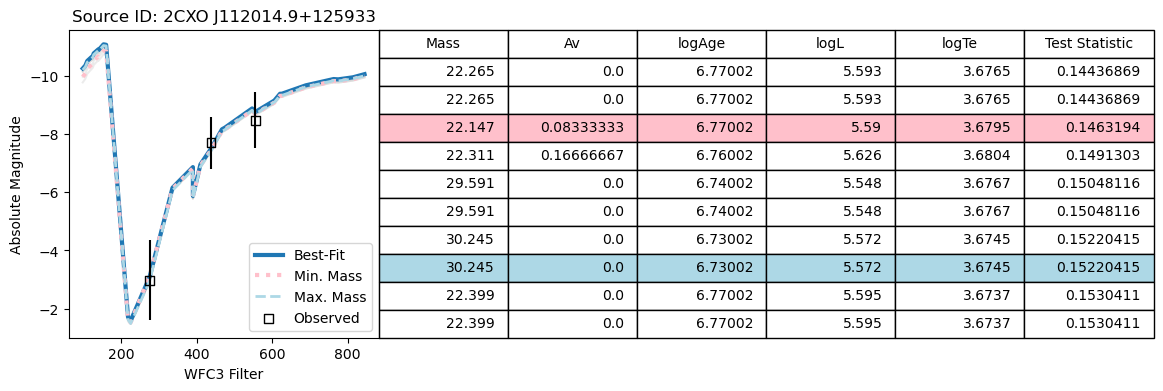

No best-fit model available for Source ID 2CXO J112015.0+125936.
No best-fit model available for Source ID 2CXO J112015.0+125921.


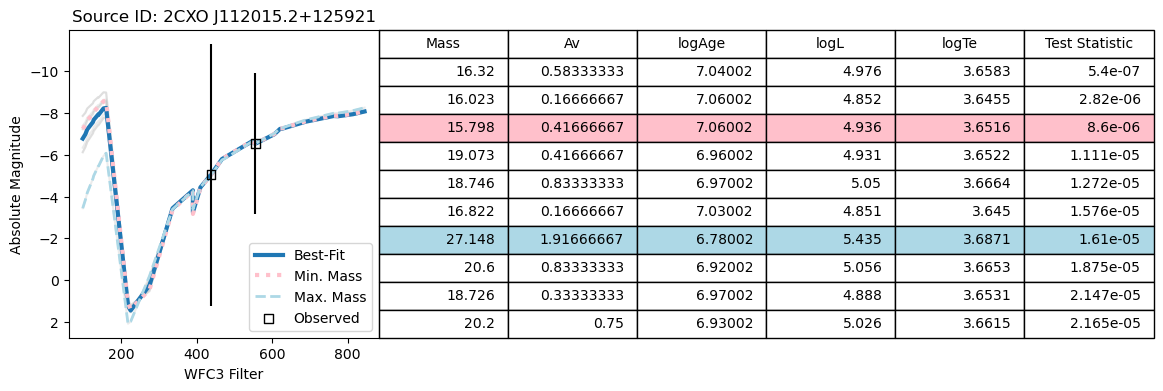

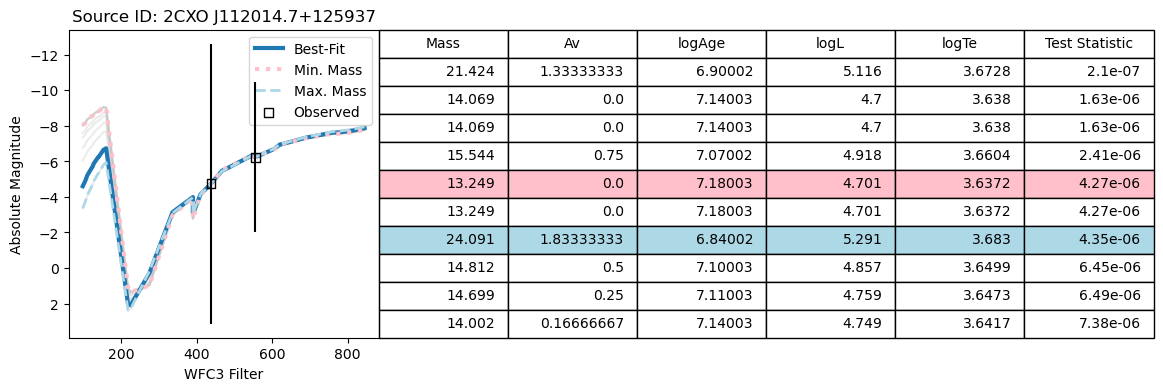

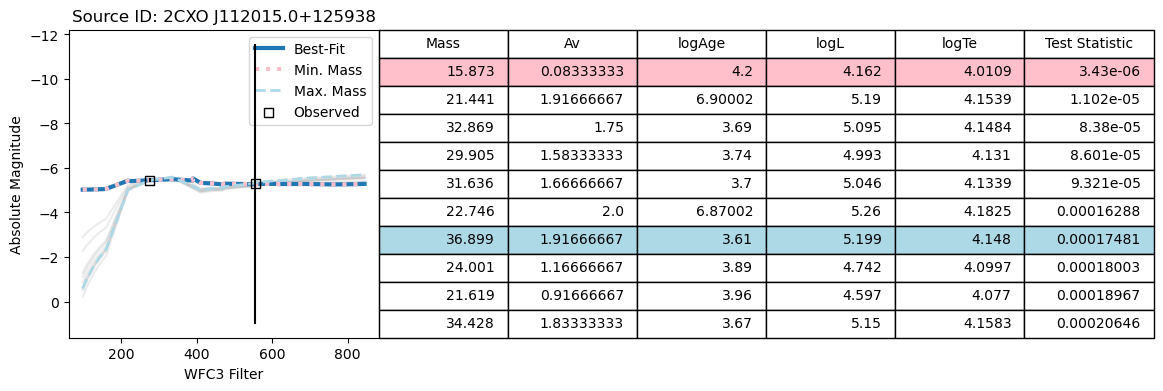

No best-fit model available for Source ID 2CXO J112015.3+125944.


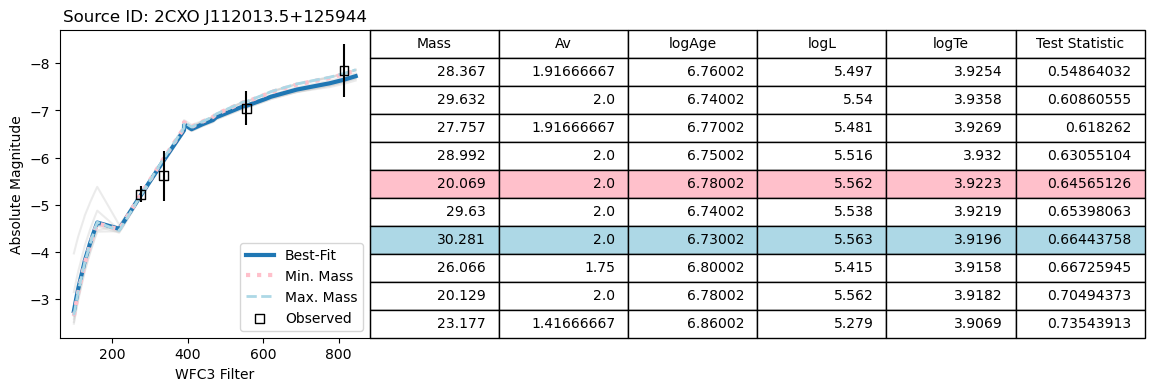

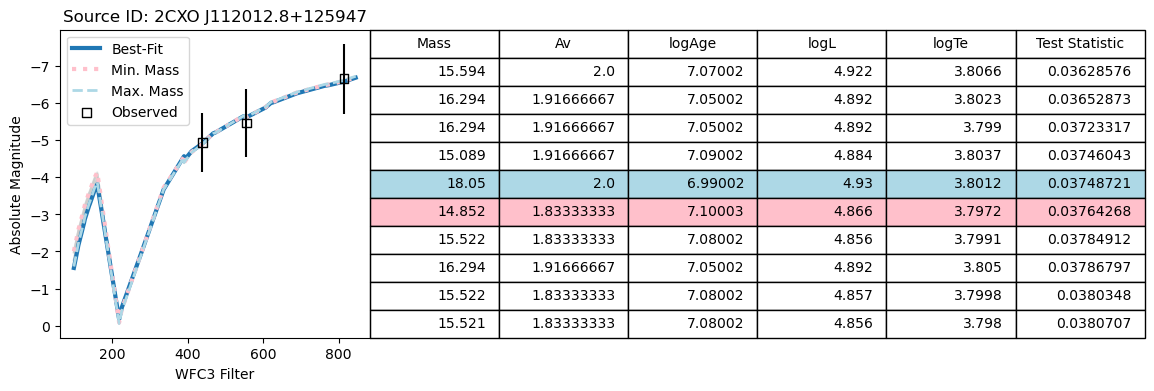

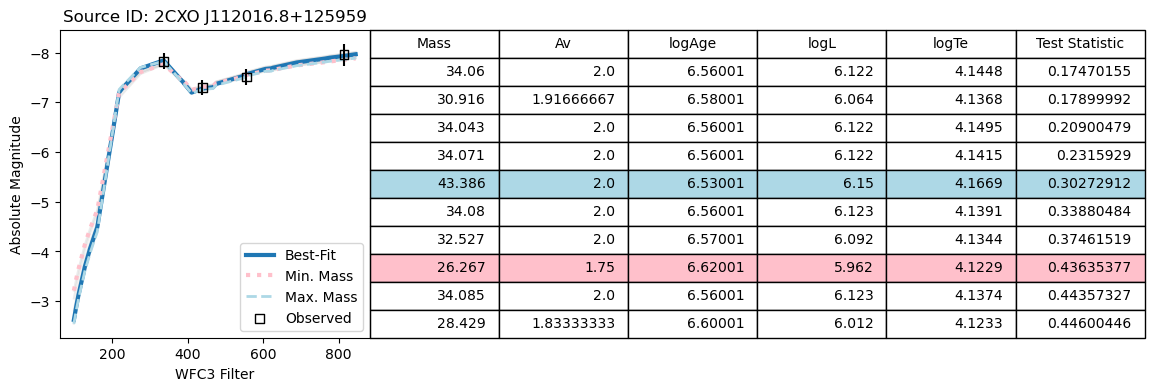

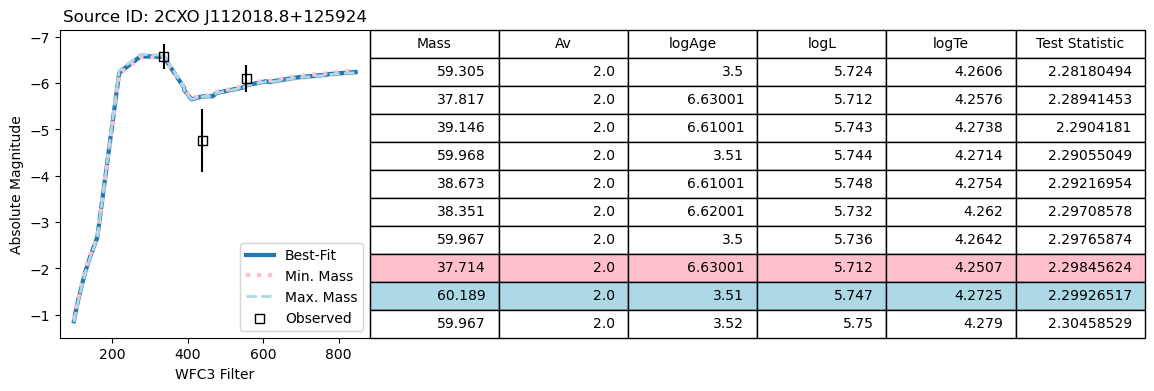

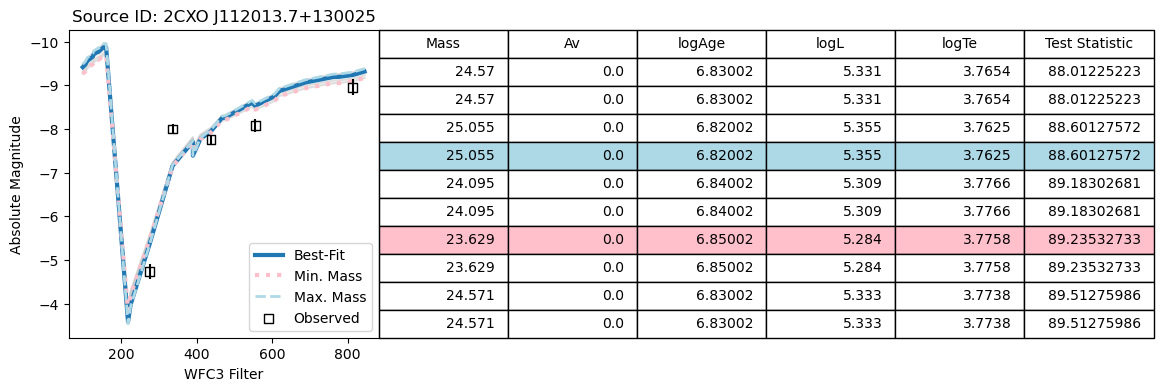

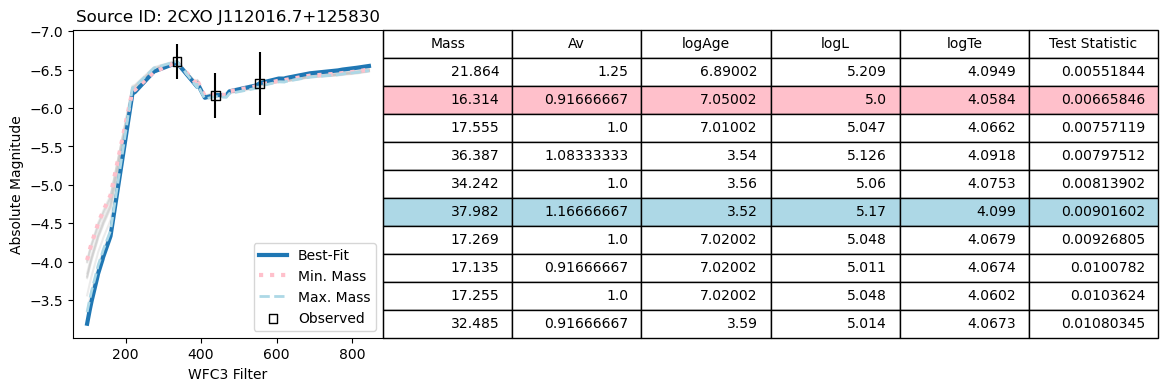

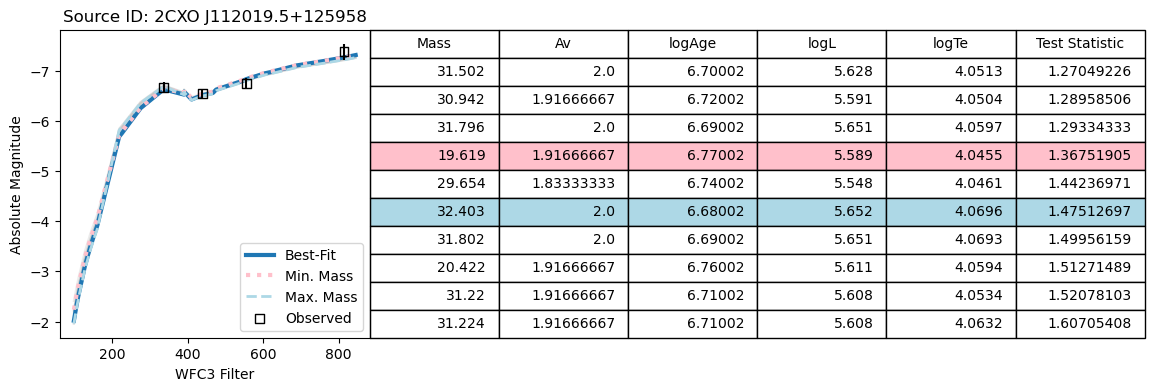

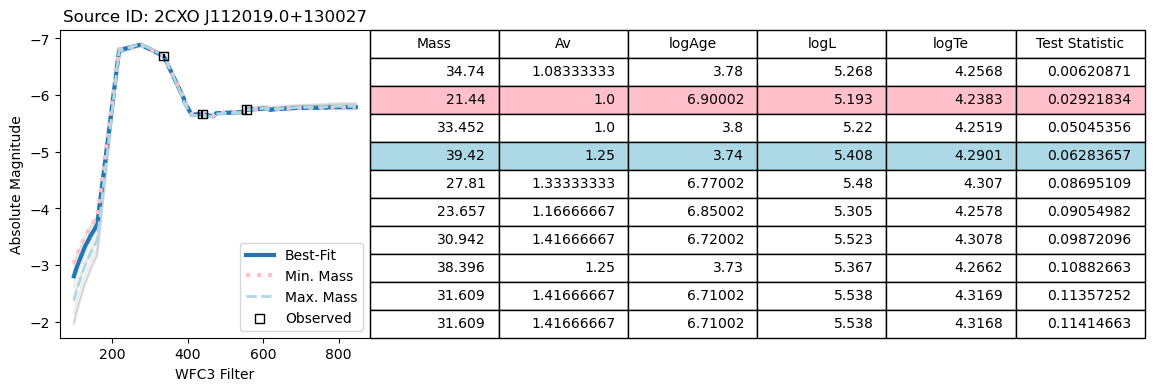

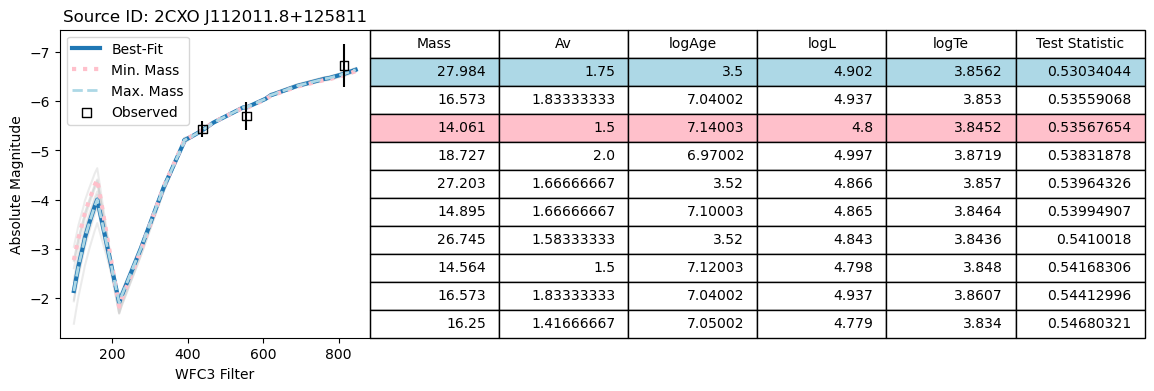

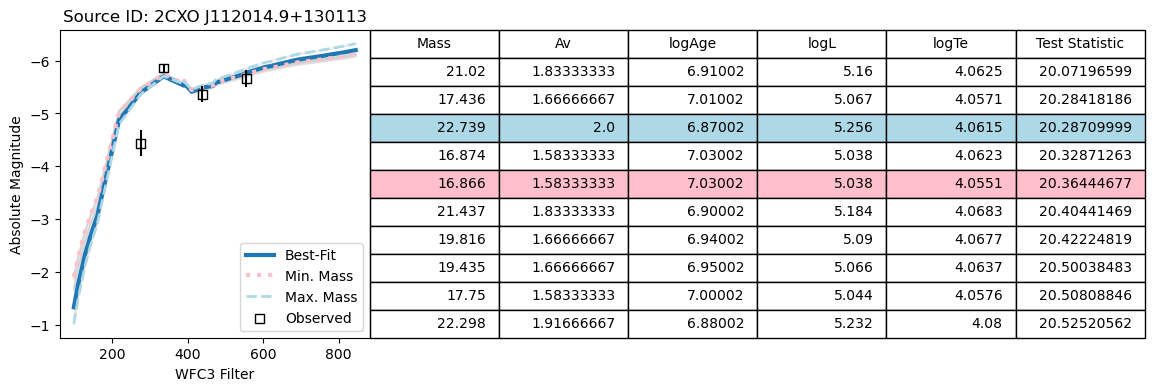

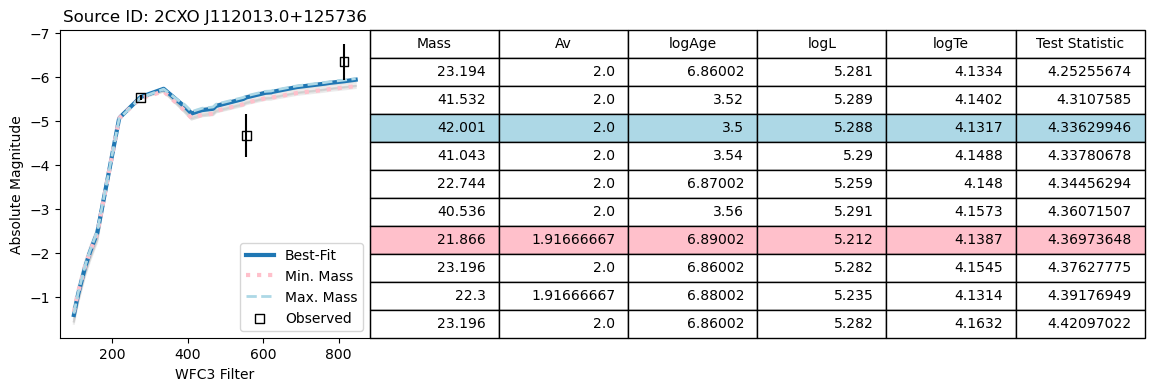

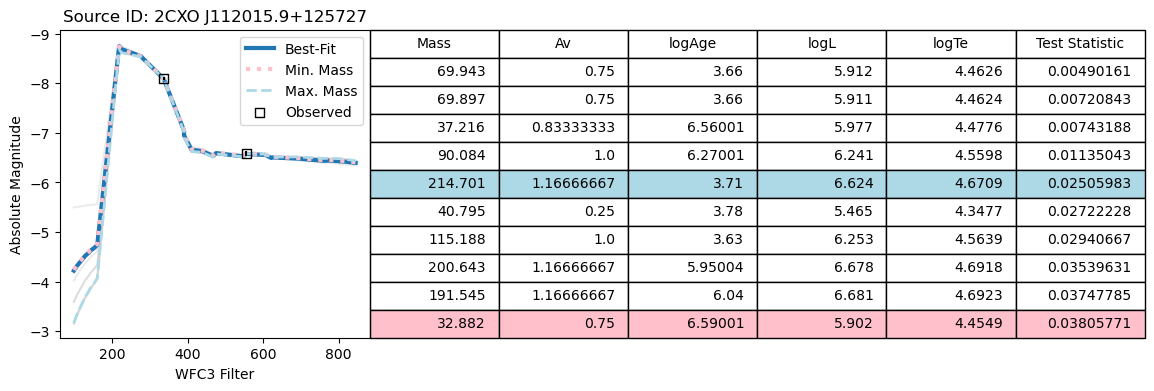

Zini       MH   logAge        Mini   int_IMF     Mass   logL   logTe  \
0    0.0152  0.01508  6.90002   22.185715  2.631074   21.424  5.116  3.6728   
1    0.0152  0.01508  7.04002   17.746626  2.630110   16.320  4.976  3.6583   
2    0.0152  0.01508  7.14003   14.447449  2.628936   14.069  4.700  3.6380   
3    0.0152  0.01508  7.14003   14.447449  2.628936   14.069  4.700  3.6380   
4    0.0152  0.01508  7.07002   16.805555  2.629828   15.544  4.918  3.6604   
..      ...      ...      ...         ...       ...      ...    ...     ...   
155  0.0152  0.01508  3.63000  115.294502  2.633602  115.188  6.253  4.5639   
156  0.0152  0.01508  6.27001  109.374084  2.633578   90.084  6.241  4.5598   
157  0.0152  0.01508  3.71000  215.388641  2.633619  214.701  6.624  4.6709   
158  0.0152  0.01508  5.95004  237.691055  2.633619  200.643  6.678  4.6918   
159  0.0152  0.01508  6.04000  238.287949  2.633619  191.545  6.681  4.6923   

      logg label  ...     F689M     F763M     F845M     F098M     F127M  \
0    0.296     1  ... -7.333222 -7.631708 -7.877828 -4.603005 -5.874111   
1    0.260     3  ... -7.581785 -7.854122 -8.071112 -6.774752 -7.669548   
2    0.391     1  ... -7.305000 -7.573000 -7.780000 -8.038000 -8.664000   
3    0.391     1  ... -7.305000 -7.573000 -7.780000 -8.038000 -8.664000   
4    0.305     3  ... -7.300437 -7.579586 -7.803716 -6.068253 -7.050562   
..     ...   ...  ...       ...       ...       ...       ...       ...   
155  3.454     0  ... -6.501916 -6.465781 -6.421621 -3.594004 -4.018083   
156  3.343     0  ... -6.499916 -6.463781 -6.420621 -3.593004 -4.016083   
157  3.782     0  ... -6.514569 -6.483245 -6.435224 -3.172504 -3.681097   
158  3.782     0  ... -6.498569 -6.466245 -6.418224 -3.153504 -3.661097   
159  3.760     0  ... -6.504569 -6.472245 -6.424224 -3.159504 -3.667097   

        F139M     F153M        Av  Test Statistic                 CSC ID  
0   -6.244935 -6.654809  1.333333    2.096291e-07  2CXO J112014.7+125937  
1   -7.926222 -8.217479  0.583333    5.386878e-07  2CXO J112015.2+125921  
2   -8.842000 -9.051000  0.000000    1.626648e-06  2CXO J112014.7+125937  
3   -8.842000 -9.051000  0.000000    1.626648e-06  2CXO J112014.7+125937  
4   -7.334714 -7.653330  0.750000    2.406067e-06  2CXO J112014.7+125937  
..        ...       ...       ...             ...                    ...  
155 -4.137952 -4.271107  1.000000    2.940667e-02  2CXO J112015.9+125727  
156 -4.135952 -4.269107  1.000000    1.135043e-02  2CXO J112015.9+125727  
157 -3.827444 -3.986958  1.166667    2.505983e-02  2CXO J112015.9+125727  
158 -3.806444 -3.966958  1.166667    3.539631e-02  2CXO J112015.9+125727  
159 -3.812444 -3.972958  1.166667    3.747785e-02  2CXO J112015.9+125727  

[160 rows x 58 columns]

In [7]:
hmxb_bestfit = FitSED(df=HMXBPhots,
                      instrument='wfc3',
                      idheader='CSC ID',
                      min_models=10,
                      plotSED=True, 
                      showHR=False,
                      model_ext=True)

display(hmxb_bestfit)

##################################################################
##################  CSC ID 2CXO J112014.9+125933   ##########################
Finding best-fit model(s)...
DONE


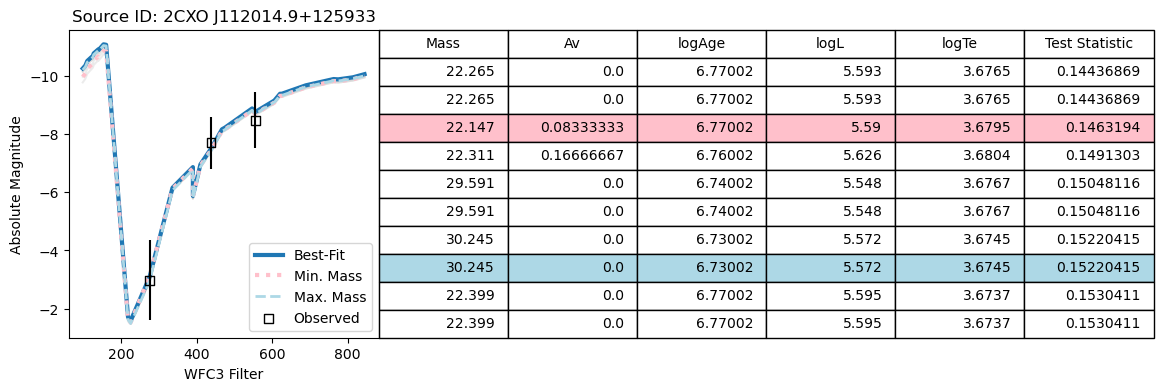

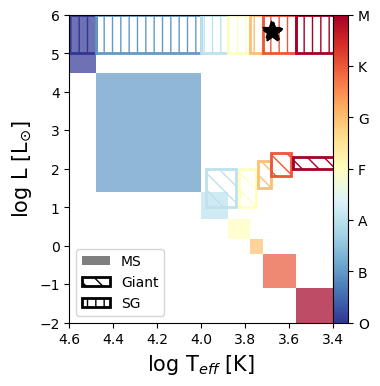

##################################################################
##################  CSC ID 2CXO J112015.0+125936   ##########################
Finding best-fit model(s)...
DONE
No best-fit model available for Source ID 2CXO J112015.0+125936.
##################################################################
##################  CSC ID 2CXO J112015.0+125921   ##########################
Finding best-fit model(s)...
DONE
No best-fit model available for Source ID 2CXO J112015.0+125921.
##################################################################
##################  CSC ID 2CXO J112015.2+125921   ##########################
Finding best-fit model(s)...
DONE


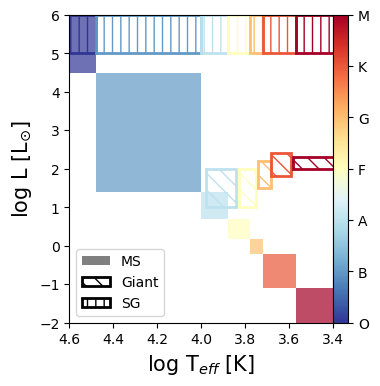

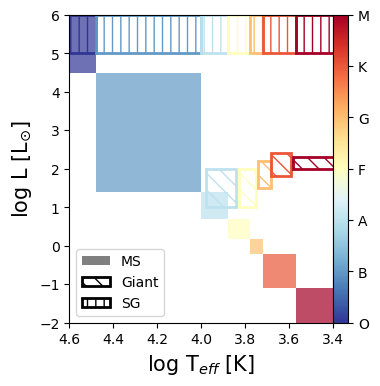

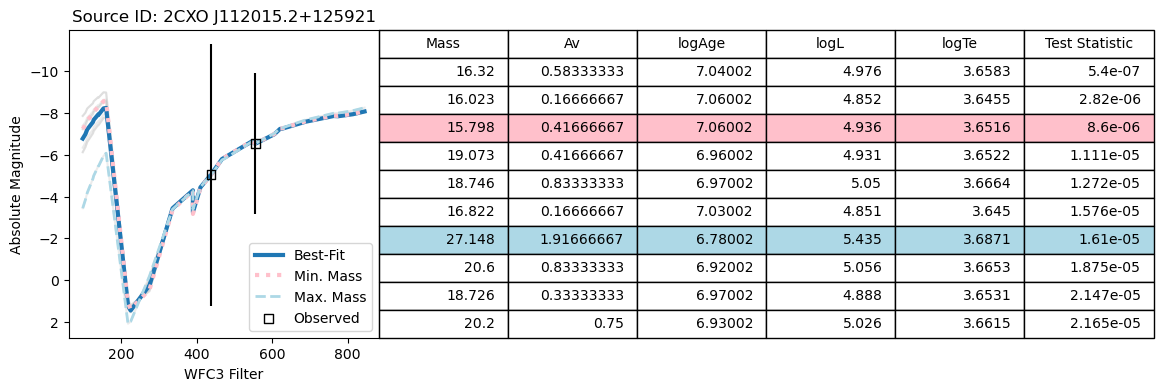

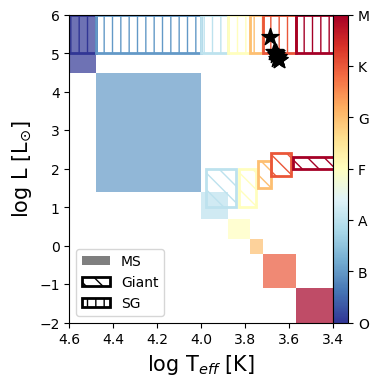

##################################################################
##################  CSC ID 2CXO J112014.7+125937   ##########################
Finding best-fit model(s)...
DONE


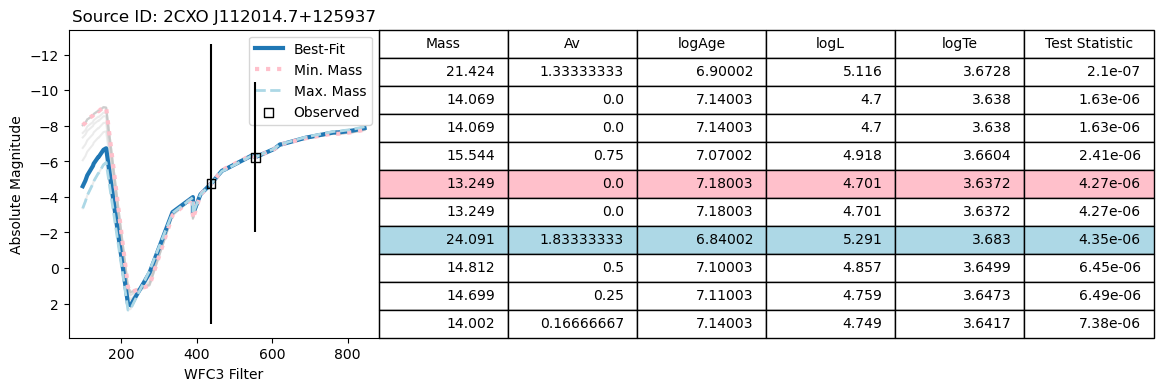

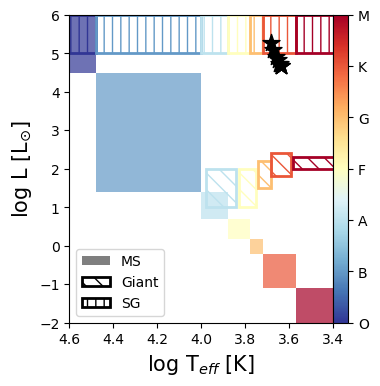

##################################################################
##################  CSC ID 2CXO J112015.0+125938   ##########################
Finding best-fit model(s)...
DONE


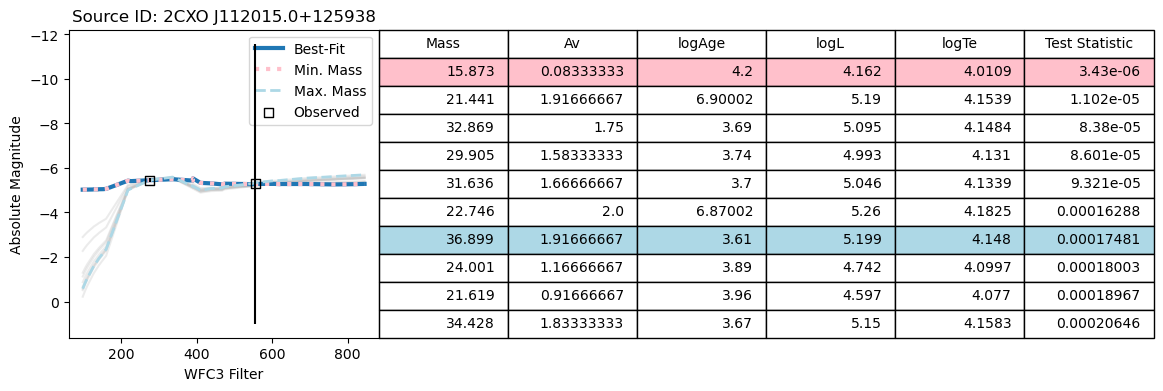

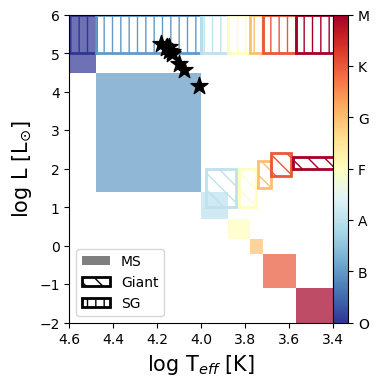

##################################################################
##################  CSC ID 2CXO J112015.3+125944   ##########################
Finding best-fit model(s)...
DONE
No best-fit model available for Source ID 2CXO J112015.3+125944.
##################################################################
##################  CSC ID 2CXO J112013.5+125944   ##########################
Finding best-fit model(s)...
DONE


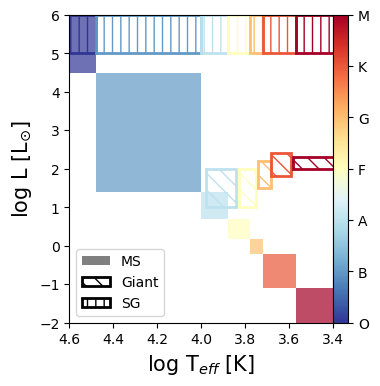

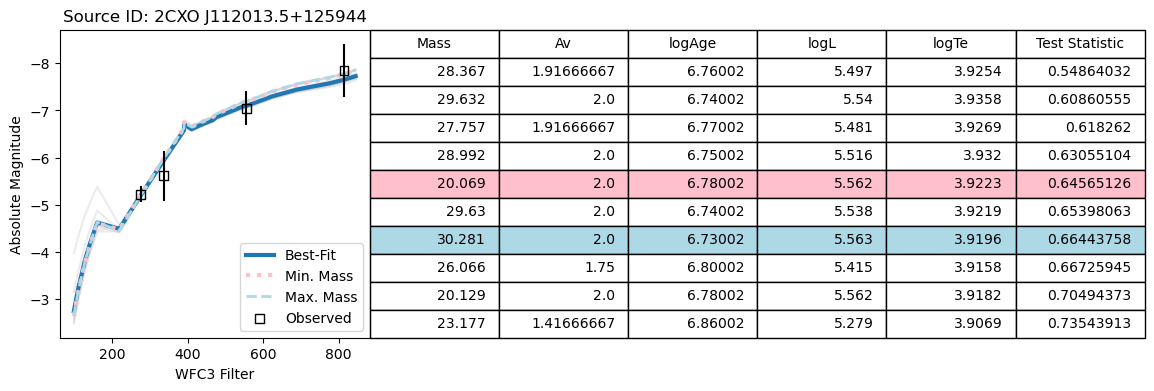

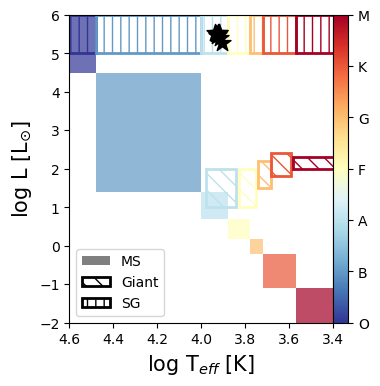

##################################################################
##################  CSC ID 2CXO J112012.8+125947   ##########################
Finding best-fit model(s)...
DONE


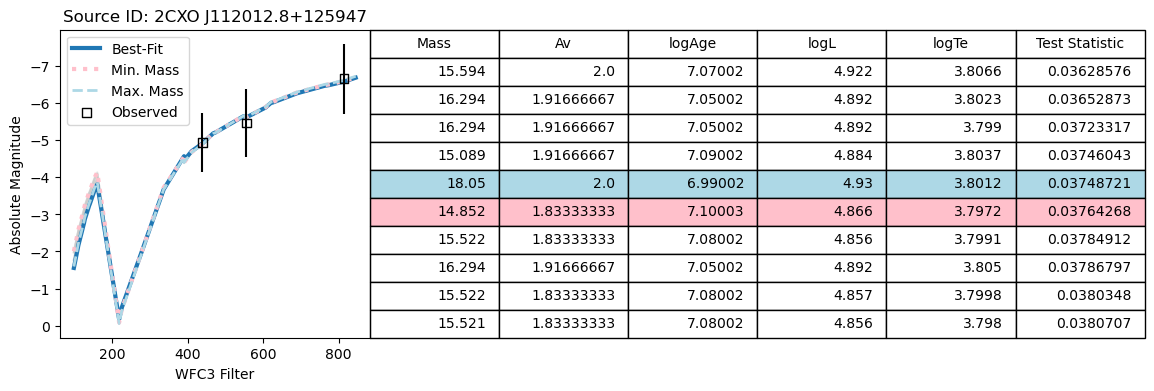

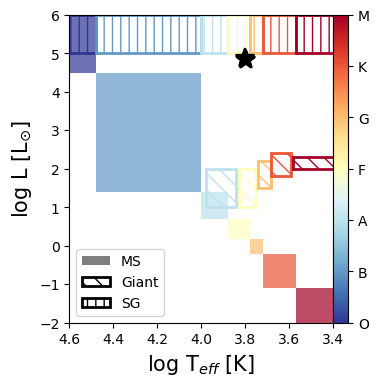

##################################################################
##################  CSC ID 2CXO J112016.8+125959   ##########################
Finding best-fit model(s)...
DONE


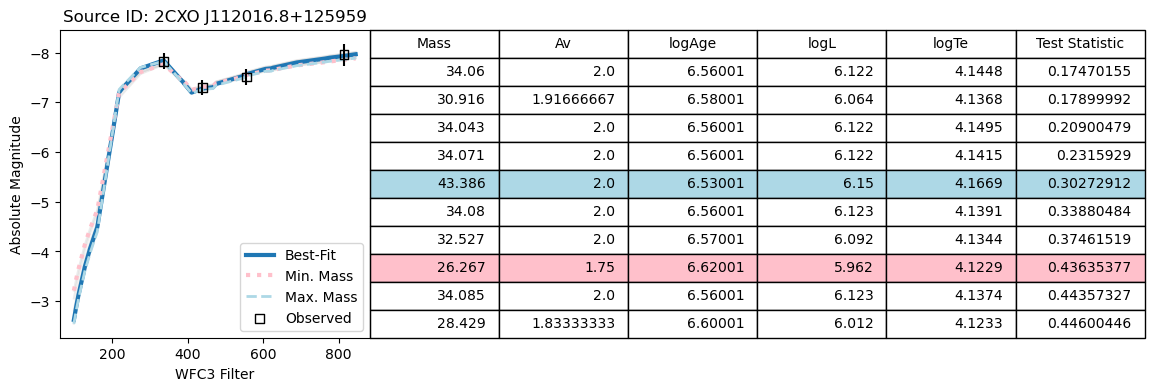

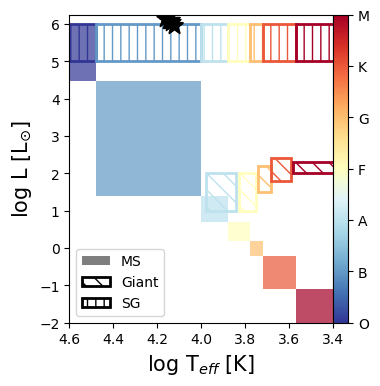

##################################################################
##################  CSC ID 2CXO J112018.8+125924   ##########################
Finding best-fit model(s)...
DONE


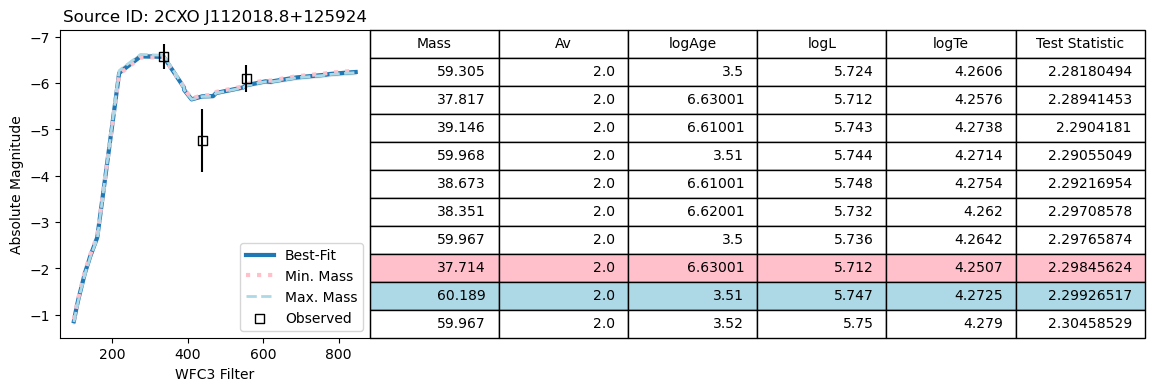

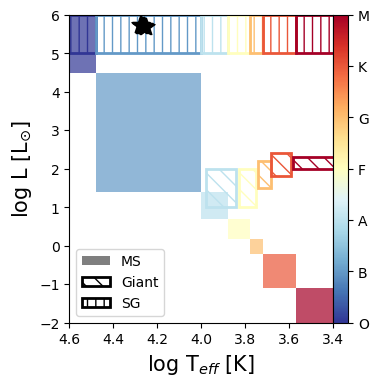

##################################################################
##################  CSC ID 2CXO J112013.7+130025   ##########################
Finding best-fit model(s)...
DONE


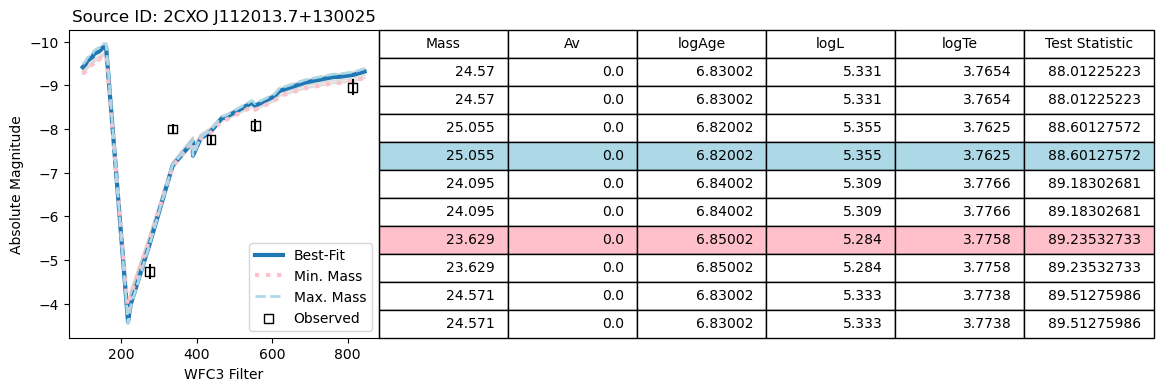

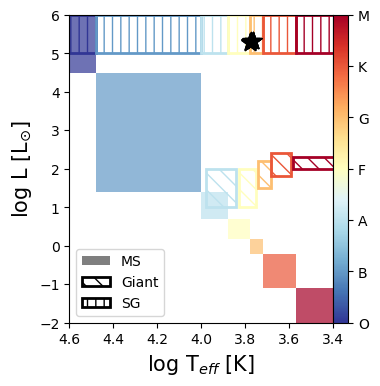

##################################################################
##################  CSC ID 2CXO J112016.7+125830   ##########################
Finding best-fit model(s)...
DONE


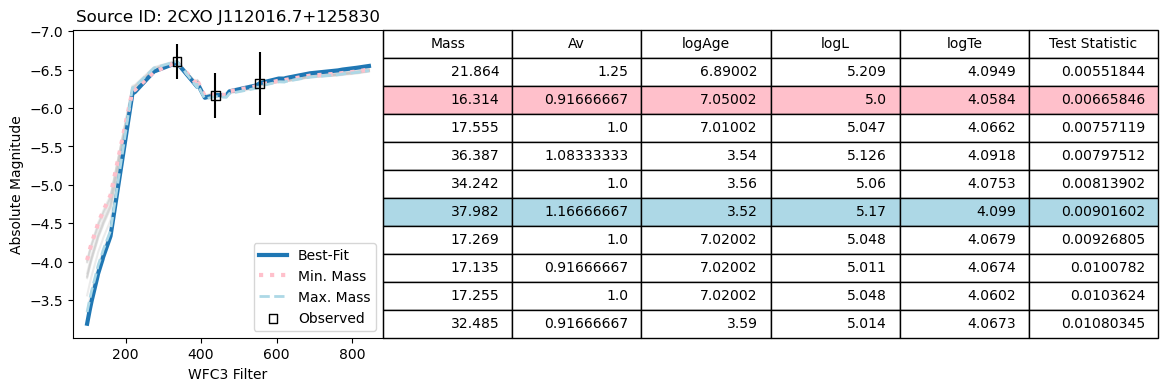

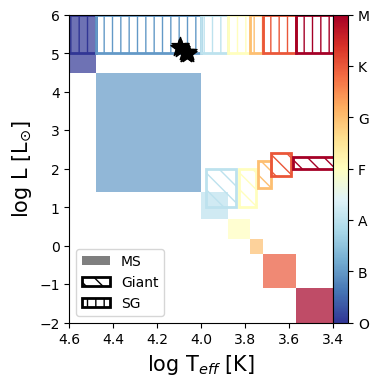

##################################################################
##################  CSC ID 2CXO J112019.5+125958   ##########################
Finding best-fit model(s)...
DONE


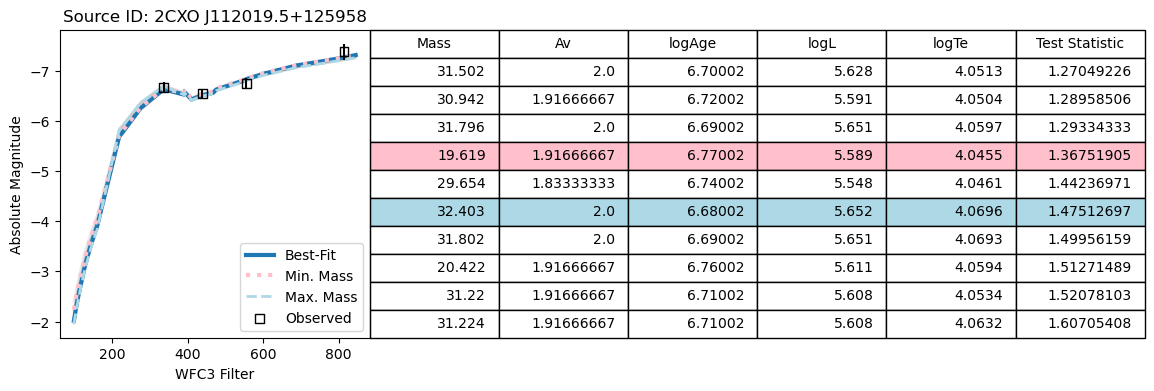

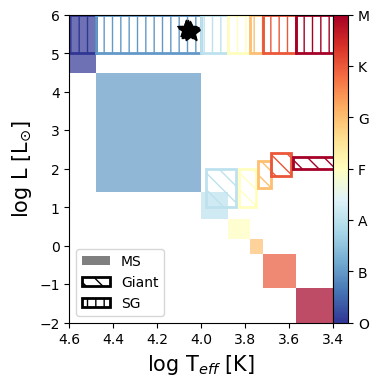

##################################################################
##################  CSC ID 2CXO J112019.0+130027   ##########################
Finding best-fit model(s)...
DONE


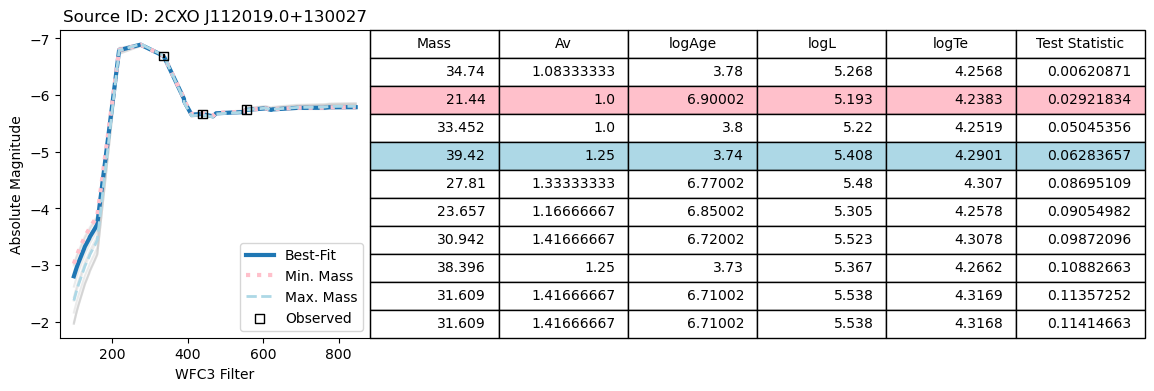

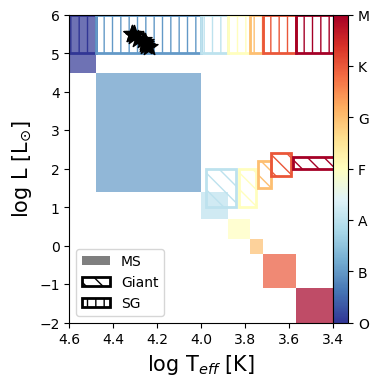

##################################################################
##################  CSC ID 2CXO J112011.8+125811   ##########################
Finding best-fit model(s)...
DONE


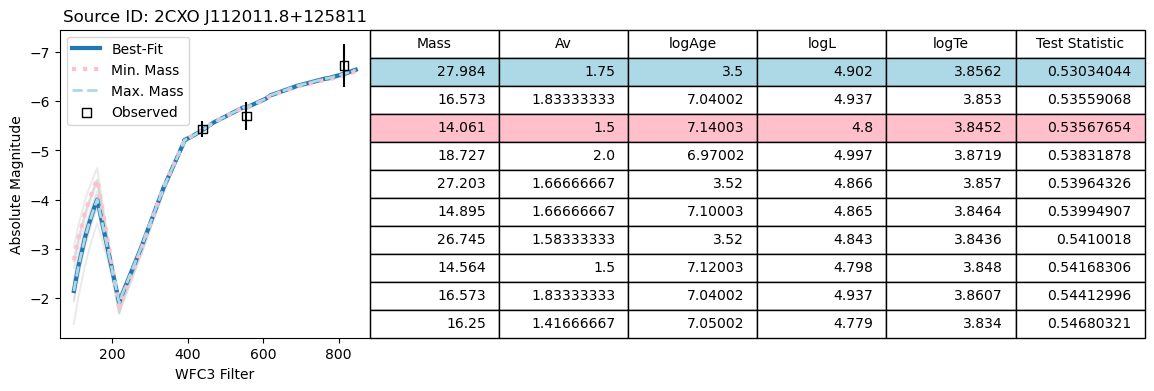

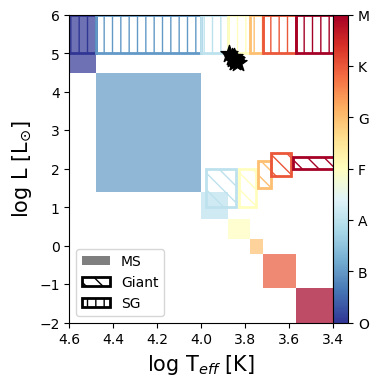

##################################################################
##################  CSC ID 2CXO J112014.9+130113   ##########################
Finding best-fit model(s)...
DONE


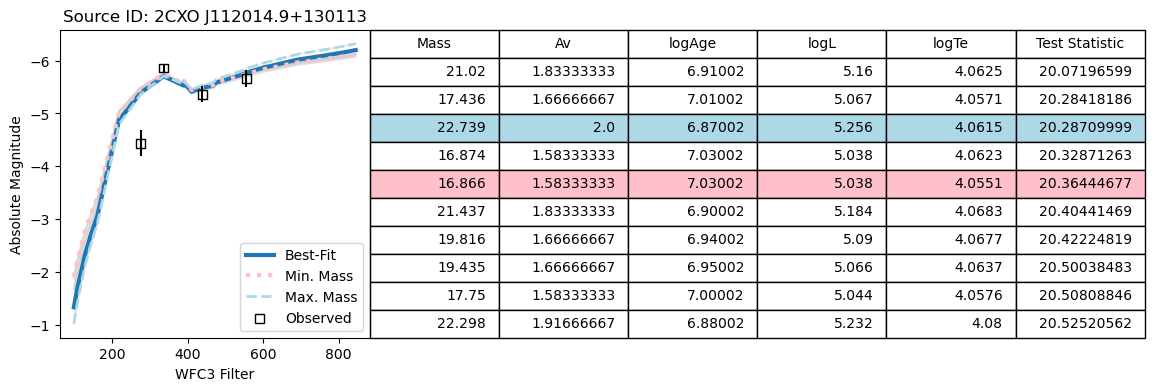

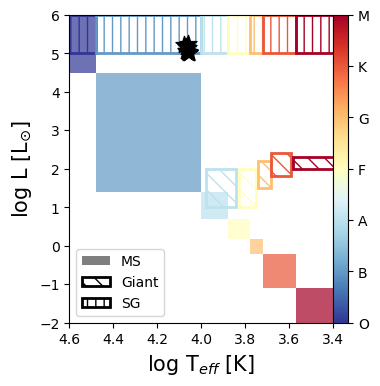

##################################################################
##################  CSC ID 2CXO J112013.0+125736   ##########################
Finding best-fit model(s)...
DONE


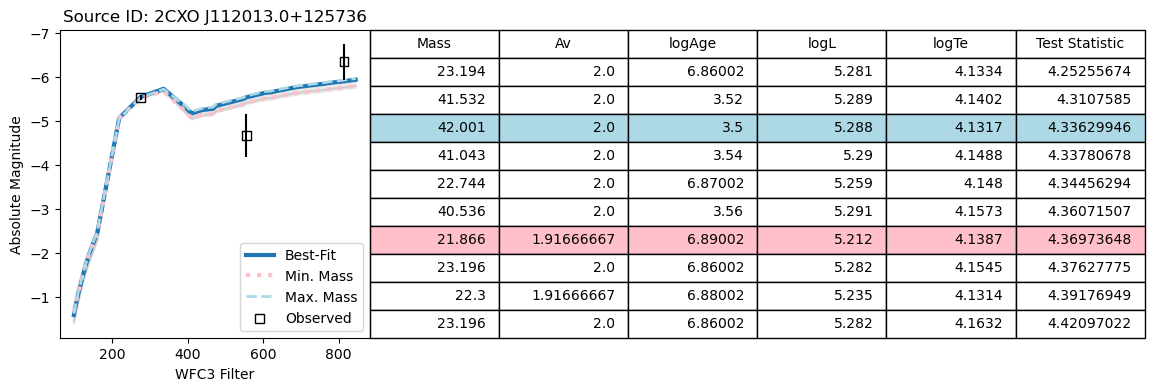

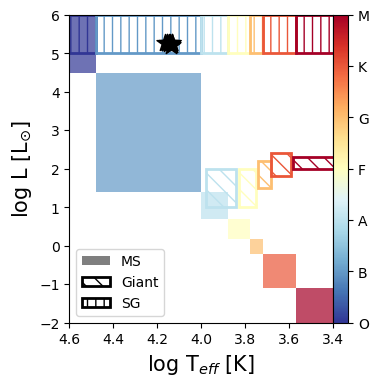

##################################################################
##################  CSC ID 2CXO J112015.9+125727   ##########################
Finding best-fit model(s)...
DONE


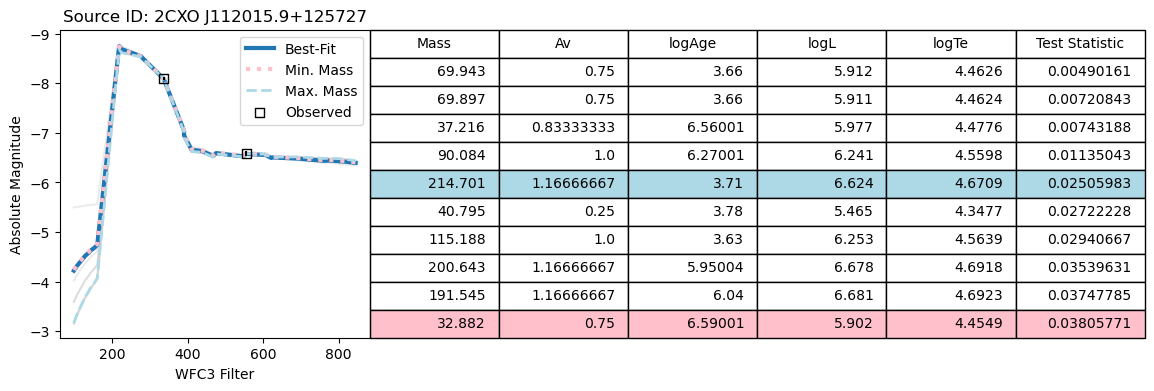

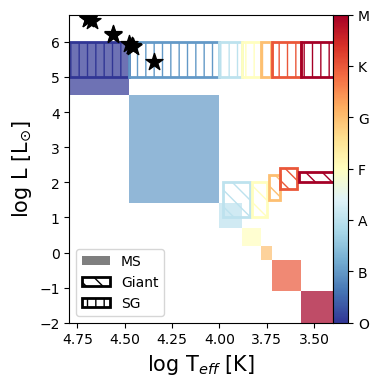

In [8]:
# Run this code to see the HR diagrams as well
for id in hmxbs['CSC ID'].tolist():
    try:
        print("##################################################################")
        print(f"##################  CSC ID {id}   ##########################")
        FitSED(df=Find(HMXBPhots, [f'CSC ID = {id}']),
               instrument='wfc3', idheader='CSC ID',
               min_models=10, plotSED=True, showHR=True, model_ext=True)
        plt.show()
        # print("##################################################################")
    except:
        # print("##################################################################")
        pass